# Two-phase COVID-19 face mask detector
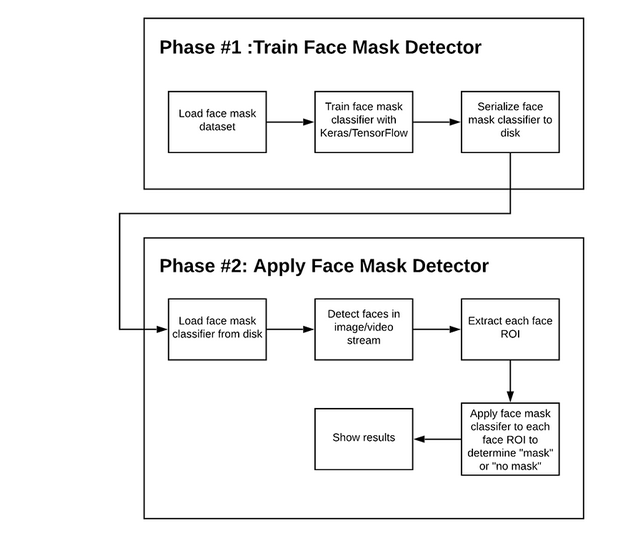

In order to train a custom face mask detector, we need to break our project into two distinct phases, each with its own respective sub-steps (as shown by Figure 1 above):

    Training: Here we’ll focus on loading our face mask detection dataset from disk, training a model (using Keras/TensorFlow) on this dataset, and then serializing the face mask detector to disk
    Deployment: Once the face mask detector is trained, we can then move on to loading the mask detector, performing face detection, and then classifying each face as with_mask
    or without_mask
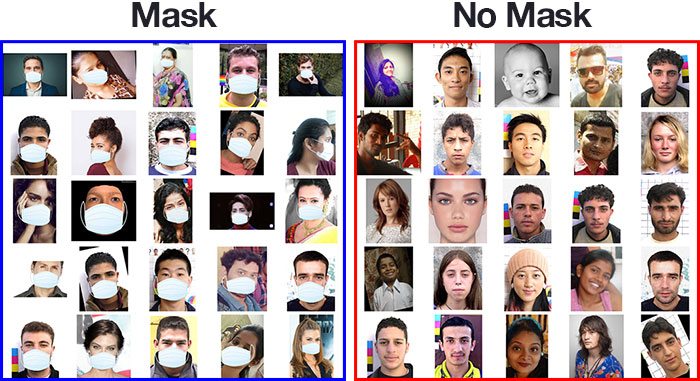

# Train
## Data Preprocessing

In [1]:
import cv2,os
import numpy as np
data_path='C:/Users/rzouga/Downloads/Github/CNN_CV/Mask_Detection'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
print(len(target))

1389



## Recale and assign catagorical lables

In [4]:
# Recale and assign catagorical lables
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [5]:
new_target.shape

(1389, 2)

In [6]:
np.save('C:/Users/rzouga/Downloads/Github/CNN_CV/images.npy',data)
np.save('C:/Users/rzouga/Downloads/Github/CNN_CV/lables.npy',new_target)


##  CNN Model
we build our Sequential CNN model with various layers such as Conv2D, MaxPooling2D, Flatten, Dropout and Dense. In the last Dense layer, we use the ‘softmax’ function to output a vector that gives the probability of each of the two classes.


In [7]:
import numpy as np
data=np.load('C:/Users/rzouga/Downloads/Github/CNN_CV/images.npy')
new_target=np.load('C:/Users/rzouga/Downloads/Github/CNN_CV/lables.npy')

In [8]:
data.shape

(1389, 100, 100, 1)

we build our Sequential CNN model with various layers such as Conv2D, MaxPooling2D, Flatten, Dropout and Dense. In the last Dense layer, we use the ‘softmax’ function to output a vector that gives the probability of each of the two classes.


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(200, (3,3), activation='relu', input_shape=data.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    #The first CNN layer followed by Relu and MaxPooling layers
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The second convolution layer followed by Relu and MaxPooling layers
    tf.keras.layers.Flatten(),#Flatten layer to stack the output convolutions from second convolution layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),#Dense layer of 50 neurons
    tf.keras.layers.Dense(2, activation='softmax')#The Final layer with two outputs for two categories
])


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0         
_________________________________________________________________
dropout (Dropout)            (None, 52900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2


# Splittiong data into traning and testing

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,callbacks=[checkpoint],validation_split=0.2)

Train on 1000 samples, validate on 250 samples
Epoch 1/200
 992/1000 [============================>.] - ETA: 1s - loss: 0.7591 - accuracy: 0.5302WARNING:tensorflow:From C:\Users\rzouga\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
1000/1000 [==============================] - 195s 195ms/sample - loss: 0.7584 - accuracy: 0.5300 - val_loss: 0.6760 - val_accuracy: 0.5480
Epoch 2/200
1000/1000 [==============================] - 185s 185ms/sample - loss: 0.5970 - accuracy: 0.6740 - val_loss: 0.4809 - val_accuracy: 0.8160
Epoch 3/200
1000/1000 [==============================] - 191s 191ms/sample - loss: 0.3979 - accuracy: 0.8360 - val_loss: 0.4242 - val_accura

In [ ]:
model.save('C:/Users/rzouga/Downloads/Github/CNN_CV//FaceMaskDetection') 

In [ ]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

# II- Deploy

In [ ]:
from keras.models import load_model
import cv2
import numpy as np


from pygame import mixer
mixer.init()
sound = mixer.Sound('C:/Users/rzouga/Downloads/Github/CNN_CV/Computer-Vision-master/Computer-Vision-master/FaceMask_detection/alarm.wav')


model1 = load_model('C:/Users/rzouga/Downloads/Github/CNN_CV/Computer-Vision-master/Computer-Vision-master/FaceMask_detection/model-090/model-090.model')

face_clsfr=cv2.CascadeClassifier('C:/Users/rzouga/Downloads/Github/CNN_CV/Computer-Vision-master/Computer-Vision-master/FaceMask_detection/haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)


labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}
  

while(True):

    ret,frame=cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model1.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_dict[label],4)
        cv2.rectangle(frame,(x,y-40),(x+w,y),color_dict[label],4)
        cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_ITALIC, 1,(255,255,255),4)
        
        if(labels_dict[label] =='MASK'):
            print("No Beep")
        elif(labels_dict[label] =='NO MASK'):
                sound.play()
                print("Beep") 
        
    cv2.imshow('Mask Detection App',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
Beep
